In [1]:
#you'll need to sudo pip3 install gensim from a terminal, since the software 
#doesn't come with the deep learning ami. remember to use pip3 since this is a python3 notebook
import os
import gensim
import gensim.downloader as api
from gensim.models.word2vec import Word2Vec
import numpy as np

#gensim expects nltks word tokens, not strings
#sudo pip3 install nltk
from nltk import word_tokenize, FreqDist
import nltk
nltk.download('punkt')

import tensorflow as tf
from tensorflow.contrib.tensorboard.plugins import projector

[nltk_data] Downloading package punkt to /home/ubuntu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
#download rotten tomatoes reviews
!wget http://www.cs.cornell.edu/people/pabo/movie-review-data/review_polarity.tar.gz
    
#unzip
!tar xvzf review_polarity.tar.gz

--2018-09-25 04:36:33--  http://www.cs.cornell.edu/people/pabo/movie-review-data/review_polarity.tar.gz
Resolving www.cs.cornell.edu (www.cs.cornell.edu)... 132.236.207.20
Connecting to www.cs.cornell.edu (www.cs.cornell.edu)|132.236.207.20|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3127238 (3.0M) [application/x-gzip]
Saving to: ‘review_polarity.tar.gz’

review_polarity.tar 100%[===================>]   2.98M  7.34MB/s    in 0.4s    

2018-09-25 04:36:34 (7.34 MB/s) - ‘review_polarity.tar.gz’ saved [3127238/3127238]

txt_sentoken/neg/cv000_29416.txt
txt_sentoken/neg/cv001_19502.txt
txt_sentoken/neg/cv002_17424.txt
txt_sentoken/neg/cv003_12683.txt
txt_sentoken/neg/cv004_12641.txt
txt_sentoken/neg/cv005_29357.txt
txt_sentoken/neg/cv006_17022.txt
txt_sentoken/neg/cv007_4992.txt
txt_sentoken/neg/cv008_29326.txt
txt_sentoken/neg/cv009_29417.txt
txt_sentoken/neg/cv010_29063.txt
txt_sentoken/neg/cv011_13044.txt
txt_sentoken/neg/cv012_29411.txt
txt_sentoken/neg/cv0

txt_sentoken/pos/cv086_18371.txt
txt_sentoken/pos/cv087_1989.txt
txt_sentoken/pos/cv088_24113.txt
txt_sentoken/pos/cv089_11418.txt
txt_sentoken/pos/cv090_0042.txt
txt_sentoken/pos/cv091_7400.txt
txt_sentoken/pos/cv092_28017.txt
txt_sentoken/pos/cv093_13951.txt
txt_sentoken/pos/cv094_27889.txt
txt_sentoken/pos/cv095_28892.txt
txt_sentoken/pos/cv096_11474.txt
txt_sentoken/pos/cv097_24970.txt
txt_sentoken/pos/cv098_15435.txt
txt_sentoken/pos/cv099_10534.txt
txt_sentoken/pos/cv100_11528.txt
txt_sentoken/pos/cv101_10175.txt
txt_sentoken/pos/cv102_7846.txt
txt_sentoken/pos/cv103_11021.txt
txt_sentoken/pos/cv104_18134.txt
txt_sentoken/pos/cv105_17990.txt
txt_sentoken/pos/cv106_16807.txt
txt_sentoken/pos/cv107_24319.txt
txt_sentoken/pos/cv108_15571.txt
txt_sentoken/pos/cv109_21172.txt
txt_sentoken/pos/cv110_27788.txt
txt_sentoken/pos/cv111_11473.txt
txt_sentoken/pos/cv112_11193.txt
txt_sentoken/pos/cv113_23102.txt
txt_sentoken/pos/cv114_18398.txt
txt_sentoken/pos/cv115_25396.txt
txt_sentoken/p

In [3]:
#iterate over the reviews and add the data and label to X and y arrays.
tokenized_reviews = []
labels=[]

#for each sub_folder in the rotten tomatoes folder of reviews
for sub_folder in os.listdir('txt_sentoken'):
    #print the name of the sub_folder
    print (sub_folder)
    #for each file in the sub_folder
    for file in os.listdir('txt_sentoken/'+sub_folder):
        #print the name of the file
        print ('txt_sentoken/'+sub_folder+'/'+file)
        #open that file
        with open('txt_sentoken/'+sub_folder+'/'+file, 'r') as myfile:
            #read the file's data into memory
            data=myfile.read()
            #tokenize the string and save the tokenized content to the tokenized_reviews list
            tokenized_reviews.append(nltk.word_tokenize(data))
            #record the appropriate label for this data
            if sub_folder=='neg':
                labels.append(0)
            else:
                labels.append(1)

neg
txt_sentoken/neg/cv910_21930.txt
txt_sentoken/neg/cv851_21895.txt
txt_sentoken/neg/cv271_15364.txt
txt_sentoken/neg/cv100_12406.txt
txt_sentoken/neg/cv886_19210.txt
txt_sentoken/neg/cv942_18509.txt
txt_sentoken/neg/cv540_3092.txt
txt_sentoken/neg/cv779_18989.txt
txt_sentoken/neg/cv229_15200.txt
txt_sentoken/neg/cv933_24953.txt
txt_sentoken/neg/cv729_10475.txt
txt_sentoken/neg/cv350_22139.txt
txt_sentoken/neg/cv508_17742.txt
txt_sentoken/neg/cv653_2107.txt
txt_sentoken/neg/cv987_7394.txt
txt_sentoken/neg/cv777_10247.txt
txt_sentoken/neg/cv368_11090.txt
txt_sentoken/neg/cv168_7435.txt
txt_sentoken/neg/cv861_12809.txt
txt_sentoken/neg/cv974_24303.txt
txt_sentoken/neg/cv121_18621.txt
txt_sentoken/neg/cv862_15924.txt
txt_sentoken/neg/cv883_27621.txt
txt_sentoken/neg/cv441_15276.txt
txt_sentoken/neg/cv887_5306.txt
txt_sentoken/neg/cv406_22199.txt
txt_sentoken/neg/cv413_7893.txt
txt_sentoken/neg/cv944_15042.txt
txt_sentoken/neg/cv963_7208.txt
txt_sentoken/neg/cv614_11320.txt
txt_sentoken/

txt_sentoken/neg/cv891_6035.txt
txt_sentoken/neg/cv216_20165.txt
txt_sentoken/neg/cv590_20712.txt
txt_sentoken/neg/cv418_16562.txt
txt_sentoken/neg/cv186_2396.txt
txt_sentoken/neg/cv234_22123.txt
txt_sentoken/neg/cv200_29006.txt
txt_sentoken/neg/cv767_15673.txt
txt_sentoken/neg/cv765_20429.txt
txt_sentoken/neg/cv808_13773.txt
txt_sentoken/neg/cv356_26170.txt
txt_sentoken/neg/cv627_12603.txt
txt_sentoken/neg/cv553_26965.txt
txt_sentoken/neg/cv059_28723.txt
txt_sentoken/neg/cv480_21195.txt
txt_sentoken/neg/cv115_26443.txt
txt_sentoken/neg/cv332_17997.txt
txt_sentoken/neg/cv923_11951.txt
txt_sentoken/neg/cv075_6250.txt
txt_sentoken/neg/cv725_10266.txt
txt_sentoken/neg/cv648_17277.txt
txt_sentoken/neg/cv204_8930.txt
txt_sentoken/neg/cv384_18536.txt
txt_sentoken/neg/cv950_13478.txt
txt_sentoken/neg/cv412_25254.txt
txt_sentoken/neg/cv661_25780.txt
txt_sentoken/neg/cv072_5928.txt
txt_sentoken/neg/cv111_12253.txt
txt_sentoken/neg/cv013_10494.txt
txt_sentoken/neg/cv223_28923.txt
txt_sentoken/ne

txt_sentoken/neg/cv076_26009.txt
txt_sentoken/neg/cv860_15520.txt
txt_sentoken/neg/cv898_1576.txt
txt_sentoken/neg/cv410_25624.txt
txt_sentoken/neg/cv515_18484.txt
txt_sentoken/neg/cv815_23466.txt
txt_sentoken/neg/cv201_7421.txt
txt_sentoken/neg/cv004_12641.txt
txt_sentoken/neg/cv683_13047.txt
txt_sentoken/neg/cv928_9478.txt
txt_sentoken/neg/cv542_20359.txt
txt_sentoken/neg/cv744_10091.txt
txt_sentoken/neg/cv766_7983.txt
txt_sentoken/neg/cv511_10360.txt
txt_sentoken/neg/cv782_21078.txt
txt_sentoken/neg/cv422_9632.txt
txt_sentoken/neg/cv444_9975.txt
txt_sentoken/neg/cv741_12765.txt
txt_sentoken/neg/cv819_9567.txt
txt_sentoken/neg/cv988_20168.txt
txt_sentoken/neg/cv125_9636.txt
txt_sentoken/neg/cv056_14663.txt
txt_sentoken/neg/cv512_17618.txt
txt_sentoken/neg/cv170_29808.txt
txt_sentoken/neg/cv927_11471.txt
txt_sentoken/neg/cv188_20687.txt
txt_sentoken/neg/cv620_2556.txt
txt_sentoken/neg/cv281_24711.txt
txt_sentoken/neg/cv241_24602.txt
txt_sentoken/neg/cv330_29675.txt
txt_sentoken/neg/cv

txt_sentoken/neg/cv697_12106.txt
txt_sentoken/neg/cv088_25274.txt
txt_sentoken/neg/cv872_13710.txt
txt_sentoken/neg/cv518_14798.txt
txt_sentoken/neg/cv108_17064.txt
txt_sentoken/neg/cv939_11247.txt
txt_sentoken/neg/cv290_11981.txt
txt_sentoken/neg/cv137_17020.txt
txt_sentoken/neg/cv153_11607.txt
txt_sentoken/neg/cv333_9443.txt
txt_sentoken/neg/cv258_5627.txt
txt_sentoken/neg/cv318_11146.txt
txt_sentoken/neg/cv337_29061.txt
txt_sentoken/neg/cv750_10606.txt
txt_sentoken/neg/cv435_24355.txt
txt_sentoken/neg/cv504_29120.txt
txt_sentoken/neg/cv452_5179.txt
txt_sentoken/neg/cv195_16146.txt
txt_sentoken/neg/cv688_7884.txt
txt_sentoken/neg/cv549_22771.txt
txt_sentoken/neg/cv172_12037.txt
txt_sentoken/neg/cv917_29484.txt
txt_sentoken/neg/cv601_24759.txt
txt_sentoken/neg/cv289_6239.txt
txt_sentoken/neg/cv753_11812.txt
txt_sentoken/neg/cv003_12683.txt
txt_sentoken/neg/cv921_13988.txt
txt_sentoken/neg/cv463_10846.txt
txt_sentoken/neg/cv582_6678.txt
txt_sentoken/neg/cv155_7845.txt
txt_sentoken/neg/

txt_sentoken/pos/cv441_13711.txt
txt_sentoken/pos/cv101_10175.txt
txt_sentoken/pos/cv994_12270.txt
txt_sentoken/pos/cv782_19526.txt
txt_sentoken/pos/cv168_7050.txt
txt_sentoken/pos/cv017_22464.txt
txt_sentoken/pos/cv009_29592.txt
txt_sentoken/pos/cv210_9312.txt
txt_sentoken/pos/cv884_13632.txt
txt_sentoken/pos/cv169_23778.txt
txt_sentoken/pos/cv155_7308.txt
txt_sentoken/pos/cv701_14252.txt
txt_sentoken/pos/cv848_10036.txt
txt_sentoken/pos/cv279_18329.txt
txt_sentoken/pos/cv781_5262.txt
txt_sentoken/pos/cv197_29328.txt
txt_sentoken/pos/cv053_21822.txt
txt_sentoken/pos/cv313_18198.txt
txt_sentoken/pos/cv918_2693.txt
txt_sentoken/pos/cv016_4659.txt
txt_sentoken/pos/cv196_29027.txt
txt_sentoken/pos/cv528_10822.txt
txt_sentoken/pos/cv136_11505.txt
txt_sentoken/pos/cv058_8025.txt
txt_sentoken/pos/cv706_24716.txt
txt_sentoken/pos/cv208_9020.txt
txt_sentoken/pos/cv255_13683.txt
txt_sentoken/pos/cv905_29114.txt
txt_sentoken/pos/cv106_16807.txt
txt_sentoken/pos/cv368_10466.txt
txt_sentoken/pos/c

txt_sentoken/pos/cv558_29507.txt
txt_sentoken/pos/cv143_19666.txt
txt_sentoken/pos/cv687_21100.txt
txt_sentoken/pos/cv932_13401.txt
txt_sentoken/pos/cv777_10094.txt
txt_sentoken/pos/cv584_29722.txt
txt_sentoken/pos/cv574_22156.txt
txt_sentoken/pos/cv739_11209.txt
txt_sentoken/pos/cv692_15451.txt
txt_sentoken/pos/cv396_17989.txt
txt_sentoken/pos/cv183_18612.txt
txt_sentoken/pos/cv702_11500.txt
txt_sentoken/pos/cv681_9692.txt
txt_sentoken/pos/cv986_13527.txt
txt_sentoken/pos/cv024_6778.txt
txt_sentoken/pos/cv463_10343.txt
txt_sentoken/pos/cv616_29319.txt
txt_sentoken/pos/cv510_23360.txt
txt_sentoken/pos/cv843_15544.txt
txt_sentoken/pos/cv360_8398.txt
txt_sentoken/pos/cv178_12972.txt
txt_sentoken/pos/cv931_17563.txt
txt_sentoken/pos/cv190_27052.txt
txt_sentoken/pos/cv187_12829.txt
txt_sentoken/pos/cv359_6647.txt
txt_sentoken/pos/cv028_26746.txt
txt_sentoken/pos/cv993_29737.txt
txt_sentoken/pos/cv919_16380.txt
txt_sentoken/pos/cv238_12931.txt
txt_sentoken/pos/cv418_14774.txt
txt_sentoken/p

txt_sentoken/pos/cv637_1250.txt
txt_sentoken/pos/cv140_7479.txt
txt_sentoken/pos/cv719_5713.txt
txt_sentoken/pos/cv883_27751.txt
txt_sentoken/pos/cv397_29023.txt
txt_sentoken/pos/cv201_6997.txt
txt_sentoken/pos/cv433_10144.txt
txt_sentoken/pos/cv229_13611.txt
txt_sentoken/pos/cv440_15243.txt
txt_sentoken/pos/cv906_11491.txt
txt_sentoken/pos/cv550_22211.txt
txt_sentoken/pos/cv947_10601.txt
txt_sentoken/pos/cv407_22637.txt
txt_sentoken/pos/cv291_26635.txt
txt_sentoken/pos/cv622_8147.txt
txt_sentoken/pos/cv978_20929.txt
txt_sentoken/pos/cv079_11933.txt
txt_sentoken/pos/cv482_10580.txt
txt_sentoken/pos/cv038_9749.txt
txt_sentoken/pos/cv901_11017.txt
txt_sentoken/pos/cv971_10874.txt
txt_sentoken/pos/cv040_8276.txt
txt_sentoken/pos/cv314_14422.txt
txt_sentoken/pos/cv497_26980.txt
txt_sentoken/pos/cv071_12095.txt
txt_sentoken/pos/cv438_8043.txt
txt_sentoken/pos/cv434_5793.txt
txt_sentoken/pos/cv347_13194.txt
txt_sentoken/pos/cv112_11193.txt
txt_sentoken/pos/cv102_7846.txt
txt_sentoken/pos/cv5

txt_sentoken/pos/cv493_12839.txt
txt_sentoken/pos/cv084_13566.txt
txt_sentoken/pos/cv240_14336.txt
txt_sentoken/pos/cv236_11565.txt
txt_sentoken/pos/cv406_21020.txt
txt_sentoken/pos/cv473_7367.txt
txt_sentoken/pos/cv499_10658.txt
txt_sentoken/pos/cv738_10116.txt
txt_sentoken/pos/cv783_13227.txt
txt_sentoken/pos/cv878_15694.txt
txt_sentoken/pos/cv242_10638.txt
txt_sentoken/pos/cv381_20172.txt
txt_sentoken/pos/cv924_29540.txt
txt_sentoken/pos/cv780_7984.txt
txt_sentoken/pos/cv241_23130.txt
txt_sentoken/pos/cv328_10373.txt
txt_sentoken/pos/cv787_13743.txt
txt_sentoken/pos/cv757_10189.txt
txt_sentoken/pos/cv610_2287.txt
txt_sentoken/pos/cv466_18722.txt
txt_sentoken/pos/cv277_19091.txt
txt_sentoken/pos/cv227_24215.txt
txt_sentoken/pos/cv134_22246.txt
txt_sentoken/pos/cv223_29066.txt
txt_sentoken/pos/cv394_5137.txt
txt_sentoken/pos/cv428_11347.txt
txt_sentoken/pos/cv252_23779.txt
txt_sentoken/pos/cv135_11603.txt
txt_sentoken/pos/cv297_10047.txt
txt_sentoken/pos/cv217_28842.txt
txt_sentoken/p

In [4]:
#the number of reviews we have from rotten tomatoes
print (len(tokenized_reviews))
#an example of tokenized data. this one below if the first rotten tomatoes review
print (len(tokenized_reviews[0]))
print (tokenized_reviews[0])

2000
698
['>', 'from', 'writer', 'and', 'director', 'darren', 'stein', 'comes', 'jawbreaker', ',', 'the', 'poorly', 'told', 'tale', 'of', 'what', 'can', 'happen', 'when', 'an', 'innocent', 'birthday', 'prank', 'goes', 'wrong', '.', 'at', 'reagan', 'high', ',', 'four', 'girls', 'are', 'sitting', 'on', 'top', 'of', 'the', 'world', '.', 'courtney', 'shane', ',', 'played', 'by', 'rose', 'mcgowan', ',', 'holds', 'the', 'title', 'of', 'meanest', ',', 'most', 'disrespectful', 'soul', 'in', 'the', 'school', '.', 'everyone', 'hates', 'her', ',', 'but', 'everyone', 'envies', 'her', 'due', 'to', 'her', 'popularity', '.', 'courtney', 'is', 'the', '``', 'leader', '``', 'of', 'her', 'clique', ',', 'which', 'also', 'includes', 'julie', ',', 'played', 'by', 'rebecca', 'gayheart', ',', 'liz', 'purr', ',', 'played', 'by', 'charlotte', 'roldan', ',', 'and', 'marcie', ',', 'played', 'by', 'julie', 'benz', 'are', 'the', 'other', 'three', 'in', 'the', 'group', '.', 'it', 'is', 'liz', "'s", 'seventeenth', 'b

In [5]:
#nltk api exploration
saying=['After','all','is','said','and','done','more','is','said','than','done']
#only unique words in a set
tokens=set(saying)
#sort those unique words in alphabetical order
tokens=sorted(tokens)
print (tokens)
#and print the 2nd to last word in alphabetical order
print (tokens[-2])
print()

['After', 'all', 'and', 'done', 'is', 'more', 'said', 'than']
said



the first review has 298 unique words and 698 total words
<FreqDist with 298 samples and 698 outcomes>

printing the top 10 most common words
[(',', 52), ('the', 40), ('.', 31), ('is', 16), ('of', 16), ('and', 15), ('to', 15), ('a', 13), ('her', 12), ('in', 12)]

sample with the greatest count ,

frequency of the word "that" 8

cumulative frequency chart of the top 25 most common words


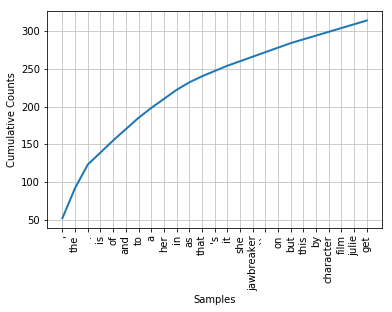

In [6]:
#back to our rotten tomatoes data

#make an nltk frequency distribution object
fdist1 = FreqDist(tokenized_reviews[0])
print('the first review has 298 unique words and 698 total words')
print (fdist1)

#fdist1.keys() returns the samples sorted in order of decreasing frequency
print ('\nprinting the top 10 most common words')
print (fdist1.most_common(10))

print ('\nsample with the greatest count '+fdist1.max())

print ('\nfrequency of the word "that" '+str(fdist1['that']))
print ('\ncumulative frequency chart of the top 25 most common words')
fdist1.plot(25, cumulative=True)

In [7]:
# build vocabulary and train gensim word2vec model
model = gensim.models.Word2Vec(
    tokenized_reviews,
    size=100,
    window=3,
    min_count=10,
    workers=10)
#model.train(tokenized_reviews, total_examples=len(tokenized_reviews), epochs=10)

#number of distinct words
print (len(model.wv.vocab))


#gensim api exploration: https://radimrehurek.com/gensim/models/word2vec.html
print ('five most similar words to the entered word')
print (model.wv.most_similar(positive=['she'], topn=5))
print ('\nsimilarity score between the two entered words')
print (model.wv.similarity(w1='good',w2='great'))
print ('\nthe embedding for the entered word')
print (model.wv['she'])

print ('\ncount frequency of the entered word')
print (model.wv.vocab["she"].count)

9322
five most similar words to the entered word
[('he', 0.8828983306884766), ('everyone', 0.6635793447494507), ('someone', 0.6310160160064697), ('nobody', 0.6019923686981201), ('death', 0.5947790741920471)]

similarity score between the two entered words
0.789415305042

the embedding for the entered word
[-0.12779258 -0.72988486  0.29696426  0.04411611 -1.38774884 -1.42154467
  1.12464643  0.01119734 -0.02250234  0.48857731  1.44288683 -1.18449736
  1.00161743 -0.52766675  1.44825709  3.20973468 -2.04651761 -2.01425552
 -0.01886413 -1.01211917  0.43705645  0.08934115 -0.66680747  0.05792145
 -0.11547219 -0.23622845 -0.8359012  -0.60728312  0.8424204   0.35644537
 -0.15271467  0.48446196 -0.67347437 -0.344771   -0.17854124  0.50182468
 -0.26212406 -0.25079671  1.10090888 -0.83800274 -0.12904848 -0.79007477
 -1.43214786 -0.33413237 -0.69316489  0.20433585 -1.73524094  0.89274567
  1.26921642 -1.35718656  0.45572948 -1.13355184 -0.50763965 -0.67185187
 -0.4922038  -1.13294554  0.40844736

In [8]:
#now that we have our embeddings, it's time to send them to tensorflow/tensorboard

def visualize(model, output_path):
    meta_file = "w2x_metadata.tsv"
    placeholder = np.zeros((len(model.wv.index2word), model.vector_size))    # 'model.vector_size' used to be '100'
    # I needed to change '100' to 'model.vector_size' to accommodate generalized sizes of word vectors.
    try:
        os.mkdir(output_path)
    except FileExistsError:
        pass

    with open(os.path.join(output_path,meta_file), 'wb') as file_metadata:
        for i, word in enumerate(model.wv.index2word):
            placeholder[i] = model[word]
            # temporary solution for https://github.com/tensorflow/tensorflow/issues/9094
            if word == '':
                print("Empty Line, should replaced by any thing else, or will cause a bug of tensorboard")
                file_metadata.write("{0}".format('<Empty Line>').encode('utf-8') + b'\n')
            else:
                file_metadata.write("{0}".format(word).encode('utf-8') + b'\n')

    # define the model without training
    sess = tf.InteractiveSession()

    embedding = tf.Variable(placeholder, trainable = False, name = 'w2x_metadata')
    tf.global_variables_initializer().run()

    saver = tf.train.Saver()
    writer = tf.summary.FileWriter(output_path, sess.graph)

    # adding into projector
    config = projector.ProjectorConfig()
    embed = config.embeddings.add()
    embed.tensor_name = 'w2x_metadata'
    embed.metadata_path = meta_file

    # Specify the width and height of a single thumbnail.
    projector.visualize_embeddings(writer, config)
    print(os.path.join(output_path,'w2x_metadata.ckpt'))
    saver.save(sess, os.path.join(output_path,'w2x_metadata.ckpt'))
    print('Run `tensorboard --logdir={0}` to run visualize result on tensorboard'.format(output_path))


try:
    output_path  = '/home/ubuntu/NLTK_Gensim_Tensorboard/projector'
except:
    print("Please provide model path and output path")
visualize(model, output_path)


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


/home/ubuntu/NLTK_Gensim_Tensorboard/projector/w2x_metadata.ckpt
Run `tensorboard --logdir=/home/ubuntu/NLTK_Gensim_Tensorboard/projector` to run visualize result on tensorboard
